In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import random
mnist = input_data.read_data_sets("MNIST_data1/", one_hot=True)

Extracting MNIST_data1/train-images-idx3-ubyte.gz
Extracting MNIST_data1/train-labels-idx1-ubyte.gz
Extracting MNIST_data1/t10k-images-idx3-ubyte.gz
Extracting MNIST_data1/t10k-labels-idx1-ubyte.gz


In [3]:
X = tf.placeholder("float",[None,784])
Y = tf.placeholder(tf.float32, [None,10])

W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(X,W) + b

#AdamOptimizer 이 뭐지??
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

#parameters
training_epochs = 15
batch_size = 100


for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print("Epoch:","%04d" % (epoch+1), "cost =", "{:.9f}".format(avg_cost))
    
print("Learning Finished")

correct_prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Accuracy:",sess.run(acc,feed_dict = {X:mnist.test.images, Y:mnist.test.labels}))

#cost가 줄지않는것은 learning_rate 문제였음. 0.1이라는 값이 너무 큰값이어서 0.01로 바꾸니 optimizing이 잘 됨

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch: 0001 cost = 1.353028352
Epoch: 0002 cost = 0.509959906
Epoch: 0003 cost = 0.419197300
Epoch: 0004 cost = 0.376514742
Epoch: 0005 cost = 0.348280549
Epoch: 0006 cost = 0.332249476
Epoch: 0007 cost = 0.318352117
Epoch: 0008 cost = 0.307266997
Epoch: 0009 cost = 0.303897737
Epoch: 0010 cost = 0.295898528
Epoch: 0011 cost = 0.293605270
Epoch: 0012 cost = 0.286806610
Epoch: 0013 cost = 0.282766575
Epoch: 0014 cost = 0.281189223
Epoch: 0015 cost = 0.278446931
Learning Finished
Accuracy: 0.9163


In [4]:
X = tf.placeholder("float",[None,784])
Y = tf.placeholder(tf.float32, [None,10])


W1 = tf.Variable(tf.random_normal([784,256]))
b1 = tf.Variable(tf.random_normal([256]))
layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)

W2 = tf.Variable(tf.random_normal([256,256]))
b2 = tf.Variable(tf.random_normal([256]))
layer2 = tf.nn.relu(tf.matmul(layer1,W2)+b2)

W3 = tf.Variable(tf.random_normal([256,10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(layer2,W3) + b3

#AdamOptimizer 이 뭐지??
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
learning_rate = 0.01 ##중요한 parameter! 이값에 의해 학습이 안될수도 있음.
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

#parameters
training_epochs = 15
batch_size = 100


for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print("Epoch:","%04d" % (epoch+1), "cost =", "{:.9f}".format(avg_cost))
    
print("Learning Finished")

correct_prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Accuracy:",sess.run(acc,feed_dict = {X:mnist.test.images, Y:mnist.test.labels}))

#cost가 줄지않는것은 learning_rate 문제였음. 0.1이라는 값이 너무 큰값이어서 0.01로 바꾸니 optimizing이 잘 됨
#우와.... Deep NN을 적당히 wide 하게, 적당히 Deep 하게 설정하면 96%까지 정확도가 나오는구나 ;;;
#개쩐다 96%의 정확도라니 ㅋㅋㅋ

# 참고로 이걸 앞에 달아놓으면 에러 안나온다는걸 깨달음
#tf.reset_default_graph() # Xavier 가중치 초기 에러 방지

Epoch: 0001 cost = 58.391631509
Epoch: 0002 cost = 9.671087266
Epoch: 0003 cost = 5.192970092
Epoch: 0004 cost = 3.763512855
Epoch: 0005 cost = 2.957302986
Epoch: 0006 cost = 2.240471452
Epoch: 0007 cost = 2.380579406
Epoch: 0008 cost = 2.064285554
Epoch: 0009 cost = 1.970534652
Epoch: 0010 cost = 1.677353259
Epoch: 0011 cost = 1.563081558
Epoch: 0012 cost = 1.416251378
Epoch: 0013 cost = 0.931397089
Epoch: 0014 cost = 0.969975588
Epoch: 0015 cost = 1.214818562
Learning Finished
Accuracy: 0.9598


In [5]:
# 초기화 하는 방법 (Xavier initialization) 자비에 초기화만 추가!
# 위와 동일하지만 더 wide하고 Deep하게!
X = tf.placeholder("float",[None,784])
Y = tf.placeholder(tf.float32, [None,10])

with tf.variable_scope("w1", reuse=tf.AUTO_REUSE):
    w1 = tf.get_variable("w1", shape = [784,512], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
layer1 = tf.nn.relu(tf.matmul(X,w1)+b1)

with tf.variable_scope("w2", reuse=tf.AUTO_REUSE):
    w2 = tf.get_variable("w2",shape = [512,512],initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
layer2 = tf.nn.relu(tf.matmul(layer1,w2)+b2)

with tf.variable_scope("w3", reuse=tf.AUTO_REUSE):
    w3 = tf.get_variable("w3",shape = [512,512],initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
layer3 = tf.nn.relu(tf.matmul(layer2,w3)+b3)

with tf.variable_scope("w4", reuse=tf.AUTO_REUSE):
    w4 = tf.get_variable("w4",shape = [512,512],initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
layer4 = tf.nn.relu(tf.matmul(layer3,w4)+b4)

with tf.variable_scope("w5", reuse=tf.AUTO_REUSE):
    w5 = tf.get_variable("w5",shape = [512,10],initializer = tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(layer4,w5) + b5

#AdamOptimizer 이 뭐지??
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
learning_rate = 0.01 ##중요한 parameter! 이값에 의해 학습이 안될수도 있음.
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

#parameters
training_epochs = 15
batch_size = 100


for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print("Epoch:","%04d" % (epoch+1), "cost =", "{:.9f}".format(avg_cost))
    
print("Learning Finished")

correct_prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Accuracy:",sess.run(acc,feed_dict = {X:mnist.test.images, Y:mnist.test.labels}))

#너무 딥하고 와이드 해서 Overfitting이 일어나버림
#accuracy가 올라가지 않고 오히려 조금 떨어짐.

Epoch: 0001 cost = 0.557203140
Epoch: 0002 cost = 0.185747227
Epoch: 0003 cost = 0.164437102
Epoch: 0004 cost = 0.140029003
Epoch: 0005 cost = 0.147330467
Epoch: 0006 cost = 0.133065627
Epoch: 0007 cost = 0.125465273
Epoch: 0008 cost = 0.114811215
Epoch: 0009 cost = 0.100893007
Epoch: 0010 cost = 0.116940421
Epoch: 0011 cost = 0.113076494
Epoch: 0012 cost = 0.085562071
Epoch: 0013 cost = 0.079810828
Epoch: 0014 cost = 0.128282122
Epoch: 0015 cost = 0.089185997
Learning Finished
Accuracy: 0.9602


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch: 0001 cost = 0.461900742
Epoch: 0002 cost = 0.174430296
Epoch: 0003 cost = 0.129275413
Epoch: 0004 cost = 0.109597467
Epoch: 0005 cost = 0.092013536
Epoch: 0006 cost = 0.085654741
Epoch: 0007 cost = 0.076525052
Epoch: 0008 cost = 0.068365777
Epoch: 0009 cost = 0.061272717
Epoch: 0010 cost = 0.060141341
Epoch: 0011 cost = 0.056479252
Epoch: 0012 cost = 0.052259541
Epoch: 0013 cost = 0.051125719
Epoch: 0014 cost = 0.050275468
Epoch: 0015 cost = 0.046123083
Learning Finished
Accuracy: 0.9844
Label:  [8]
Prediction:  [8]


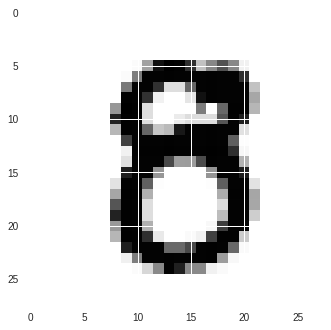

In [4]:
#Overfitting을 방지하기 위해 Dropout을 사용 (일부 Nueron을 끊음)
X = tf.placeholder("float",[None,784])
Y = tf.placeholder(tf.float32, [None,10])

keep_prob = tf.placeholder(tf.float32) #dropout시 몇%의 Neuron을 keep할 것인가.
#train시에는 0.5~0.7      ---keep_probability
#test시에는 반드시 1

w1 = tf.get_variable("w105", shape = [784,512], initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
layer1 = tf.nn.relu(tf.matmul(X,w1)+b1)
layer1 = tf.nn.dropout(layer1, keep_prob=keep_prob)

w2 = tf.get_variable("w205",shape = [512,512],initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
layer2 = tf.nn.relu(tf.matmul(layer1,w2)+b2)
layer2 = tf.nn.dropout(layer2, keep_prob=keep_prob)

w3 = tf.get_variable("w305",shape = [512,512],initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
layer3 = tf.nn.relu(tf.matmul(layer2,w3)+b3)
layer3 = tf.nn.dropout(layer3, keep_prob=keep_prob)

w4 = tf.get_variable("w405",shape = [512,512],initializer = tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
layer4 = tf.nn.relu(tf.matmul(layer3,w4)+b4)
layer4 = tf.nn.dropout(layer4, keep_prob=keep_prob)

w5 = tf.get_variable("w505",shape = [512,10],initializer = tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(layer4,w5) + b5

#AdamOptimizer 이 뭐지??
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))
learning_rate = 0.001 ##중요한 parameter! 이값에 의해 학습이 안될수도 있음.
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

#parameters
training_epochs = 15
batch_size = 100


for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs, Y: batch_ys, keep_prob:0.7} ##dropout으로 7할의 뉴런만 학습시킴.
        c, _ = sess.run([cost, optimizer], feed_dict = feed_dict)
        avg_cost += c / total_batch
    print("Epoch:","%04d" % (epoch+1), "cost =", "{:.9f}".format(avg_cost))
    
print("Learning Finished")

correct_prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Accuracy:",sess.run(acc,feed_dict = {X:mnist.test.images, Y:mnist.test.labels, keep_prob:1}))
#test할떄에는 반드시 keep_prob:1 (test에는 모든 뉴런을 사용함.)
#학습시에만 overfitting을 방지하기위해 dropout이 필요.

tf.set_random_seed(777)

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

#와우...나도 겨우 98.3%의 Accuracyが出た！！ 기쁘다 진심. 이게 deep learning의 힘이구나. 대단하다고 느낀다.
#진짜 제대로 연구해보고싶다는 생각이 계속 들정도.. 우리학과 연구실중 이거를 좀더 깊게 공부할 수 있는 연구실이 있으면 좋겠다 ㅠ

Label:  [0]
Prediction:  [8]


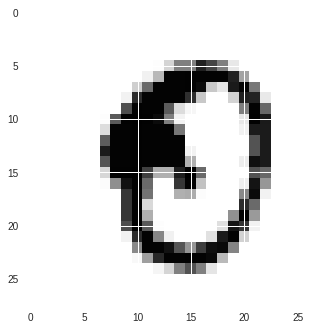

Label:  [0]
Prediction:  [6]


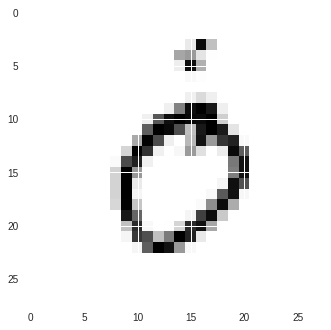

Label:  [1]
Prediction:  [3]


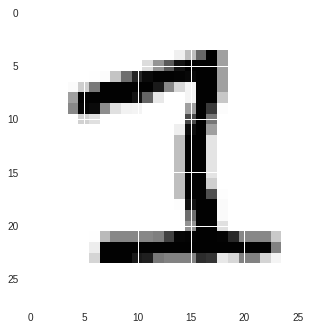

Label:  [6]
Prediction:  [4]


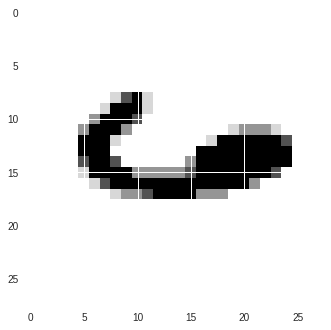

In [5]:
#98%이상의 정확도까지 왔기에 hypothesis가 틀린걸 찾기위해서 300개의 random한 데이터를 모두 대입해보았다.
#3개정도는 나오지 않을라나??
#어떤 데이터를 어떻게 잘못 봤는지도 궁금했기에..
tf.set_random_seed(777)

for i in range(300):
    r = random.randint(0, mnist.test.num_examples - 1)
    if (sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)) != sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1})):
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
        print("Prediction: ", sess.run(
            tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))
        plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
        plt.show()
#print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
#print("Prediction: ", sess.run(
#    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

#plt.imshow(mnist.test.images[r:r + 1].
#          reshape(28, 28), cmap='Greys', interpolation='nearest')
#plt.show()

In [0]:
#오늘의 실습은 정말 재미있었다.
#accuracy가 90%에서 98%까지 서서히 올라가는것도 신기했고, 
#다른 종류의 optimizer을 사용해본것도 신기했고
#Xavier Initialization 이라던지 Dropout등 배웠던 개념들을 실제로 적용하는 방법을 알게되어서 유익했다.
#역시 mnist_data로 하는 실습은 재미있는듯. 다음에는 다른 데이터들도 사용해보고싶다.